# Анализ баз данных с целью предложений по новому продукту

### Цель: 

С помощью SQL посчитать и визуализировать ключевые метрики. Проанализировать базу данных для того, чтобы помочь сформулировать ценностное предложение для нового продукта.


### Задачи:

- Исследовать таблицы — выведите первые строки, посчитайте количество строк в каждой таблице;
- Сделать по одному SQL-запросу для решения каждого задания и вывести результат;
- Сделать выводы по каждой из решённых задач.

### Описание данных

Таблица **books** Содержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.


Таблица **authors** Содержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

Таблица **publishers** Содержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;


Таблица **ratings** Содержит данные о пользовательских оценках книг:
- `rating_id`— идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.


Таблица **reviews** Содержит данные о пользовательских обзорах на книги:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

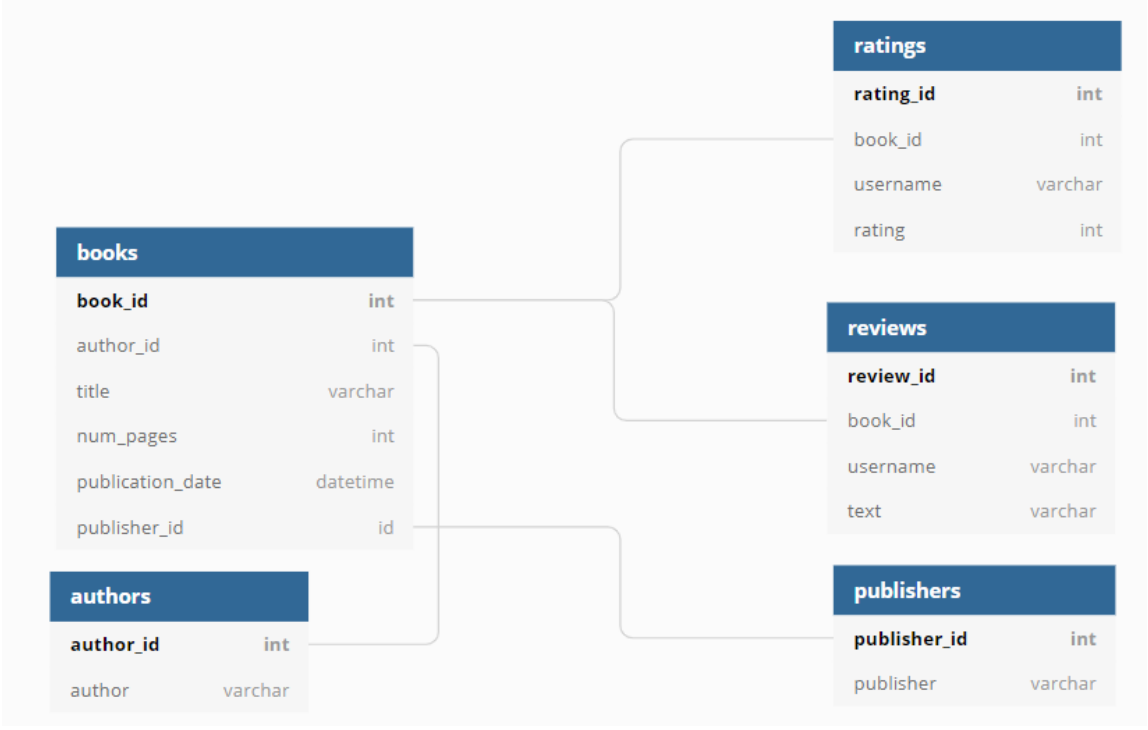

### Задания

- Посчитать, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитать количество обзоров и среднюю оценку
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определить автора с самой высокой средней оценкой книг — учитывая только книги с 50 и более оценками;
- Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [1]:
# импортируем библиотеки
import pandas as pd
import sqlalchemy as sa

In [2]:
# устанавливаем параметры
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-final-project-db' # название базы данных
}
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = sa.create_engine(connection_string, connect_args={'sslmode':'require'})
# чтобы выполнить SQL-запрос, пишем функцию с использованием Pandas
def get_sql_data(query:str, engine:sa.engine.base.Engine=engine) -> pd.DataFrame:
    with engine.connect() as con:
        return pd.read_sql(sql=sa.text(query), con = con)

In [3]:
for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = ''' SELECT * FROM {} LIMIT 5'''.format(table)
    count = '''SELECT COUNT(*) FROM {}'''.format(table)
    display("Тфблицa {}".format(table), get_sql_data(query), "Количество строк в {}".format(table), get_sql_data(count))

'Тфблицa books'

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


'Количество строк в books'

,count
0,1000


'Тфблицa authors'

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


'Количество строк в authors'

,count
0,636


'Тфблицa publishers'

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


'Количество строк в publishers'

,count
0,340


'Тфблицa ratings'

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


'Количество строк в ratings'

,count
0,6456


'Тфблицa reviews'

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


'Количество строк в reviews'

,count
0,2793


Вывод:
- в таблице books содержится информация о книгах в ней 1000 строк;
- в таблице authors содержится информация об авторах книг в ней 636 строк;
- в таблице publishers содержится информация об издательствах в ней 340 строк;
- в таблице ratings содержится информация о пользовательских оценках книг, в ней 6456 строк;

### Задания


- **Посчитать, сколько книг вышло после 1 января 2000 года;**

In [4]:
count_books = '''SELECT COUNT(book_id) FROM books WHERE publication_date > ('2000-01-01')'''
get_sql_data(count_books)

,count
0,819


После 1 января 2000 года было выпущенно 819 книг.

- **Для каждой книги посчитать количество обзоров и среднюю оценку;**

In [5]:
review_rating_cnt2 = '''SELECT b.book_id,
                               b.title,
                               COALESCE(COUNT(DISTINCT re.review_id), 0) AS review_count,
                               COALESCE(ROUND(AVG(ra.rating), 1), 0) AS rating_avg
                        FROM books AS b
                        LEFT OUTER JOIN reviews AS re ON b.book_id = re.book_id 
                        LEFT OUTER JOIN ratings AS ra ON re.book_id = ra.book_id
                        GROUP BY b.book_id, b.title
                        ORDER BY review_count DESC, rating_avg DESC;'''
get_sql_data(review_rating_cnt2)

,book_id,title,review_count,rating_avg
0,948,Twilight (Twilight #1),7,3.7
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.4
2,656,The Book Thief,6,4.3
3,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.3
4,734,The Glass Castle,6,4.2
...,...,...,...,...
995,387,Leonardo's Notebooks,0,0.0
996,221,Essential Tales and Poems,0,0.0
997,191,Disney's Beauty and the Beast (A Little Golden...,0,0.0
998,808,The Natural Way to Draw,0,0.0


Получила обзоры и среднюю оценку по всем книгам. Наибольшее количество обзоров у книги Twilight (Twilight #1), ее рейтинг 3,7.

- **Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;**

In [6]:
books_max_cnt = '''SELECT p.publisher,
                          COUNT(book_id) AS book_count
                   FROM books AS b
                   INNER JOIN publishers AS p ON b.publisher_id = p.publisher_id
                   WHERE num_pages > 50
                   GROUP BY p.publisher
                   ORDER BY book_count DESC
                   LIMIT 1'''
get_sql_data(books_max_cnt)      

,publisher,book_count
0,Penguin Books,42


Издательство Penguin Books выпустило 42 книги, это наибольшее число книг среди прочих издательств.

- **Определить автора с самой высокой средней оценкой книг — учитывая только книги с 50 и более оценками;**

In [7]:
author_max_rating = '''SELECT author,
                       ROUND(AVG(rating_avg), 2) AS rating_avg
                       FROM (SELECT a.author AS author,
                                    ROUND(AVG(ra.rating), 2) AS rating_avg,
                                    COUNT(ra.rating_id) AS rating_count 
                            FROM authors AS a
                            INNER JOIN books AS b ON a.author_id = b.author_id
                            INNER JOIN ratings AS ra ON b.book_id = ra.book_id
                            GROUP BY b.book_id, a.author) AS tab
                       WHERE rating_count > 49
                       GROUP BY author
                       ORDER BY rating_avg DESC
                       LIMIT 5'''
get_sql_data(author_max_rating)      

,author,rating_avg
0,J.K. Rowling/Mary GrandPré,4.29
1,Markus Zusak/Cao Xuân Việt Khương,4.26
2,J.R.R. Tolkien,4.26
3,Louisa May Alcott,4.19
4,Rick Riordan,4.08


Самая высокая средняя оценка у J.K. Rowling/Mary GrandPré. Рейтинг ее книги 4,29.

- **Посчитать среднее количество обзоров от пользователей, которые поставили больше 48 оценок.**

In [8]:
review_avg_cnt = '''SELECT ROUND(AVG(review_count)) AS review_avg
        FROM (SELECT username,
                     COUNT(review_id) AS review_count
            FROM reviews
            WHERE username IN (SELECT username
                               FROM ratings
                               GROUP BY username
                               HAVING COUNT(rating_id) > 48)
            GROUP BY username) AS rating_review'''
get_sql_data(review_avg_cnt)        

,review_avg
0,24.0


Пользователи, которые ставят более 48 оценок, в среднем пишут по 24 обзора. 

### Вывод:

- Выполнили запрос для всех таблиц и посчитали количество строк. 
- Выполнили запрос для книг, которые были выпущенны после 1 января 2000 года, их 819 штук.

- Выполнили запрос который для каждой книги посчитал количество обзоров и среднюю оценку. Наибольшее количество обзоров у книги Twilight (Twilight #1), ее рейтинг 3,7.

- Выполнили запрос который вывел издательство, которое выпустило наибольшее число книг среди прочих издательств, это Penguin Books - 42 книги.

- Выполнили запрос который вывел самую высокую среднюю оценку из авторов книг, имеющих более 50 оценок, это J.K. Rowling/Mary GrandPré. Рейтинг ее книги 4,29.

- Выполнили запрос который вывел среднее количество обзоров среди пользователей, которые ставят более 48 оценок, оно равняется 24 обзорам.